<a href="https://colab.research.google.com/github/cruz-marco/dex_files/blob/main/Exercicio1_reg_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Obs: faça uma cópia deste colab para sua resolução


# 1 - Regressao Linear Simples

Quando utilizamos os modelos de Regressão? Quando queremos prever uma variável contínua, isto é, um valor numérico.

Nesse exercício de hoje, iremos aprender um pouco mais sobre a biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) utilizando um dataset próprio dela para aplicarmos dentro do modelo de Regressão Linear.

Em linhas gerais, o objetivo do exercício é você desenvolver um modelo de Regressão Linear **SIMPLES** (Apenas uma variável de entrada X e uma de saída Y) para modelar a precificação de casas em Boston nos Estados Unidos. 

Neste exercício você irá:
- Importar os dados e criar o Dataframe;
- Realizar um EDA
- Escolher 3 atributos para utilizar como X do modelo
- Treinar o modelo de Regressão Linear simples para cada atributo e avaliar qual melhor modelo.

Para acessar esses dados, basta seguir o passo a passo abaixo.

In [161]:
# Importação do dataset Boston House Pricing

from sklearn.datasets import load_boston #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
dataset = load_boston()
print(dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## 1 - 1 Importação das bibliotacas

Você deve então, com esse Dataset formado Escolher 3 dos 13 atributos para criar 3 modelos e averiguar qual destes é melhor para prever o Preço da casa. Como deve-se fazer isso? **EDA**

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

Dando uma olhada mais a fundo no tipo do dataset, vemos que ele é um *sklearn.utils.Bunch*, uma espécie de objeto do sklearn. Em seguida, acessaremos seus atributos e veremos o que eles significam.

In [163]:
# Verificando os atributos do objeto
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

### 1 - 0 Criação do DataFrame


In [164]:
#Criando dataframe e series do dataset
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
tgt = pd.Series(data=dataset['target'], name='tgt' , dtype=float)

In [165]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [166]:
tgt.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: tgt, dtype: float64

In [167]:
df.describe(percentiles=[0.01, 0.15, 0.25, 0.40, 0.50, 0.60, 0.75, 0.80, 0.95, 0.99])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
1%,0.013610,0.000000,1.253500,0.000000,0.398000,4.524450,6.610000,1.206540,1.000000,188.000000,13.000000,6.730000,2.883000
15%,0.050770,0.000000,3.640000,0.000000,0.436500,5.712000,32.200000,1.802200,3.000000,254.750000,15.575000,343.857500,5.465000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
40%,0.150380,0.000000,7.380000,0.000000,0.507000,6.086000,65.400000,2.640300,5.000000,307.000000,18.400000,387.970000,9.530000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
60%,0.550070,0.000000,12.830000,0.000000,0.575000,6.376000,85.900000,3.875000,5.000000,398.000000,19.700000,393.530000,13.330000


 Variables in order:

 CRIM- per capita crime rate by town <br>
 ZN- proportion of residential land zoned for lots over 25,000 sq.ft.<br>
 INDUS-  proportion of non-retail business acres per town<br>
 CHAS- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
 NOX-  nitric oxides concentration (parts per 10 million)<br>
 RM- average number of rooms per dwelling<br>
 AGE-  proportion of owner-occupied units built prior to 1940<br>
 DIS-  weighted distances to five Boston employment centres<br>
 RAD-  index of accessibility to radial highways<br>
 TAX-  full-value property-tax rate per USD10,000<br>
 PTRATIO-  pupil-teacher ratio by town<br>
 B- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
 LSTAT-  percent lower status of the population<br><br>
 TARGET- MEDV- Median value of owner-occupied homes in USD1000's<br>



### Primeiro contato

- Head
- Describe
- Info/ Valores ausentes

In [168]:
tgt.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: tgt, dtype: float64

## 1 - 2 EDA

Você deve escolher quais serão as 3 melhores colunas para utilizarmos através do EDA e não treinando 13 modelos.

In [169]:
df.info()
df.CHAS = df.CHAS.astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [170]:
df['y'] = tgt
col_nums = list(df.select_dtypes('number').columns)

df[col_nums].corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


### Análise Gráfica

### Gráfico de correlação e escolha do atributo

De todas as colunas do nosso Dataset, quais aqueles que provavelmente terá melhor desempenho no modelo? Aqueles que terão maior correlação com o Preço da casa (Tanto positiva quanto negativa)

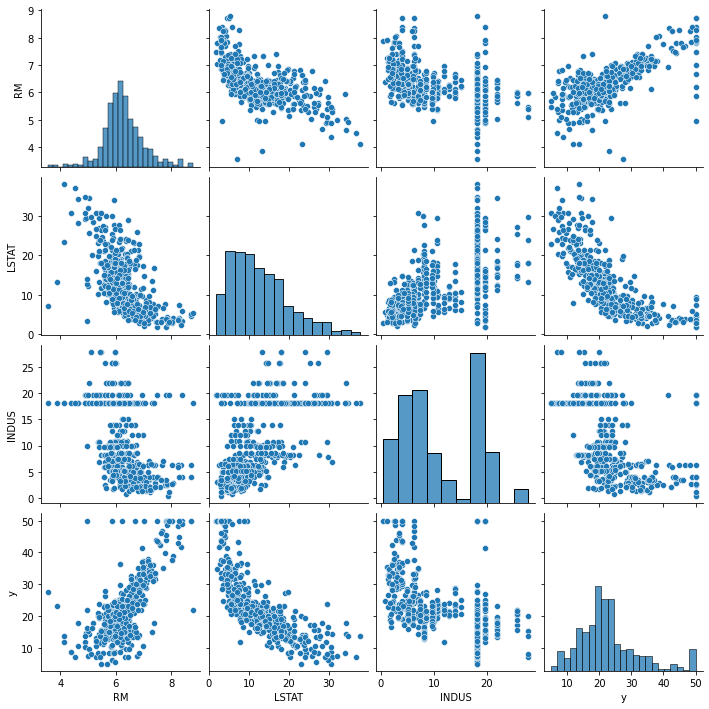

In [171]:
col_interest = 'RM LSTAT INDUS y'.split()

sns.pairplot(df[col_interest])

### Gráfico de dispersão com os valore escolhidos

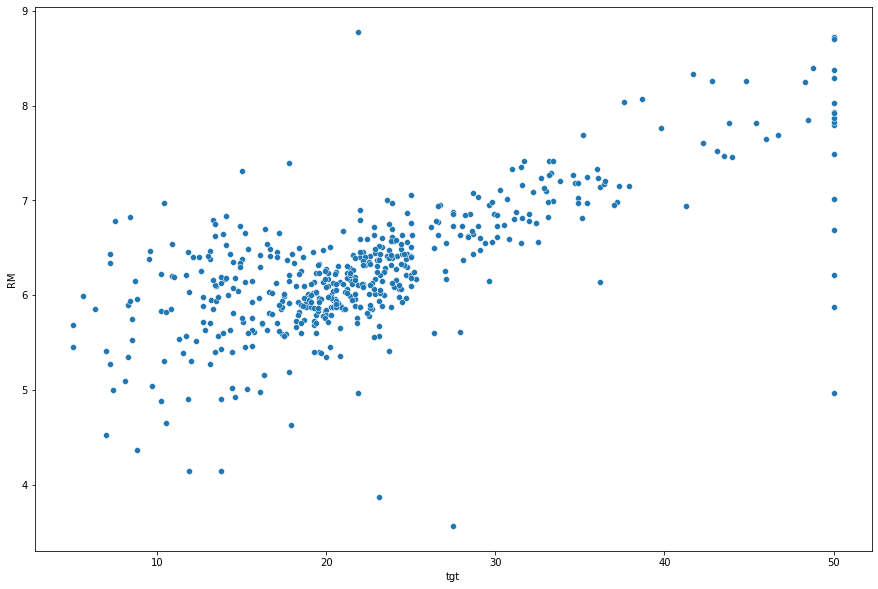

In [172]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(x=tgt, y=df['RM'])
plt.show()

### Comparação dos gráficos de dispersão

## 1 - 3 Separação Treino X Teste

In [173]:
X = pd.DataFrame()
X['RM'] = df['RM']
#X['Intercept'] = 1
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## 1 - 4 Treinamentos e validação dos modelos

Atentar-se ao fato de que estamos analisando apenas modelos **SIMPLES** isto é um X e um Y

### Treinar o modelo

In [174]:
reg = LinearRegression().fit(X_train, y_train)

### Calcular as métricas

- Fórmula da regressão
- MSE
- RMSE
- R²

In [175]:
residuals = pd.DataFrame()
residuals['real'] = y_test
residuals['predict'] = reg.predict(X_test)
residuals['residual'] = residuals['real'] - residuals['predict']

residuals

,real,predict,residual
463,20.2,24.432895,-4.232895
152,15.3,11.300129,3.999871
291,37.3,29.988729,7.311271
183,32.5,24.870363,7.629637
384,8.8,5.665552,3.134448
...,...,...,...
200,32.9,29.874987,3.025013
12,21.7,18.973304,2.726696
129,14.3,16.768470,-2.468470
194,29.1,25.229086,3.870914


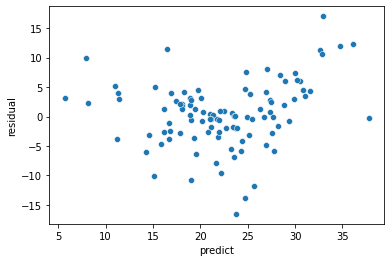

In [176]:
sns.scatterplot(x=residuals['predict'], y=residuals['residual'])

In [181]:
r2 = r2_score(residuals['real'], residuals['predict'])
mse = mean_squared_error(residuals['real'], residuals['predict'])
rmse = np.sqrt(mse)

print(f'R_sq: {r2}\nMSE: {mse}\nRMSE: {rmse}')

R_sq: 0.6335439948424493
MSE: 30.65759280465092
RMSE: 5.536929907868703


### Criar uma visualização do modelo


### Repetir procedimento

Realizar o mesmo procedimento para as outras 2 variáveis

## 1 - 5 Qual o melhor modelo?

Analise graficamente e com as métricas para chegar na conslusão.